# COMP7015: Artificial Intelligence *(Semester 1, 2024/25)*

# Lab 2: Machine Learning Basics with scikit-learn

In this lab session, we will learn how to use the `scikit-learn` package for basic machine learning tasks.


**Course Instructor: Dr. Kejing Yin (Department of Computer Science, Hong Kong Baptist University)**  
**Lab Instructor: Mr. Kenny Cheng (Department of Computer Science, Hong Kong Baptist University)**

*This lab sheet is created by Dr. Kejing Yin and is licenced under the MIT license.*

> MIT License
> 
> Copyright (c) 2024 Kejing Yin
> 
> Permission is hereby granted, free of charge, to any person obtaining a copy
> of this software and associated documentation files (the "Software"), to deal
> in the Software without restriction, including without limitation the rights
> to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
> copies of the Software, and to permit persons to whom the Software is
> furnished to do so, subject to the following conditions:
> 
> The above copyright notice and this permission notice shall be included in all
> copies or substantial portions of the Software.
> 
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
> FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
> AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
> LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
> OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
> SOFTWARE.

# 1. The packages used in this lab session

## (1) Scikit-learn
> `Scikit-learn` is an open source **machine learning library that supports supervised and unsupervised learning**. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

It has a great tutorial, please check it out at https://scikit-learn.org/stable/tutorial/index.html

## (2) Numpy
> `NumPy` is the fundamental package for **scientific computing** in Python. It is a Python library that provides a **multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays**, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

It's beginners' guide: https://numpy.org/doc/stable/user/absolute_beginners.html

## (3) Pandas
> `pandas` is a fast, powerful, flexible and easy to use open source **data analysis and manipulation tool**,
built on top of the Python programming language.

A good tutorial of Pandas: https://www.w3schools.com/python/pandas/default.asp


In short, these three packages are fundamental for machine learning in practice. You need to master them to build a good and usable machine learning model.

In [ ]:
# We import the packages first
import pandas as pd
import numpy as np
import sklearn

### What model to use?
https://scikit-learn.org/1.5/machine_learning_map.html

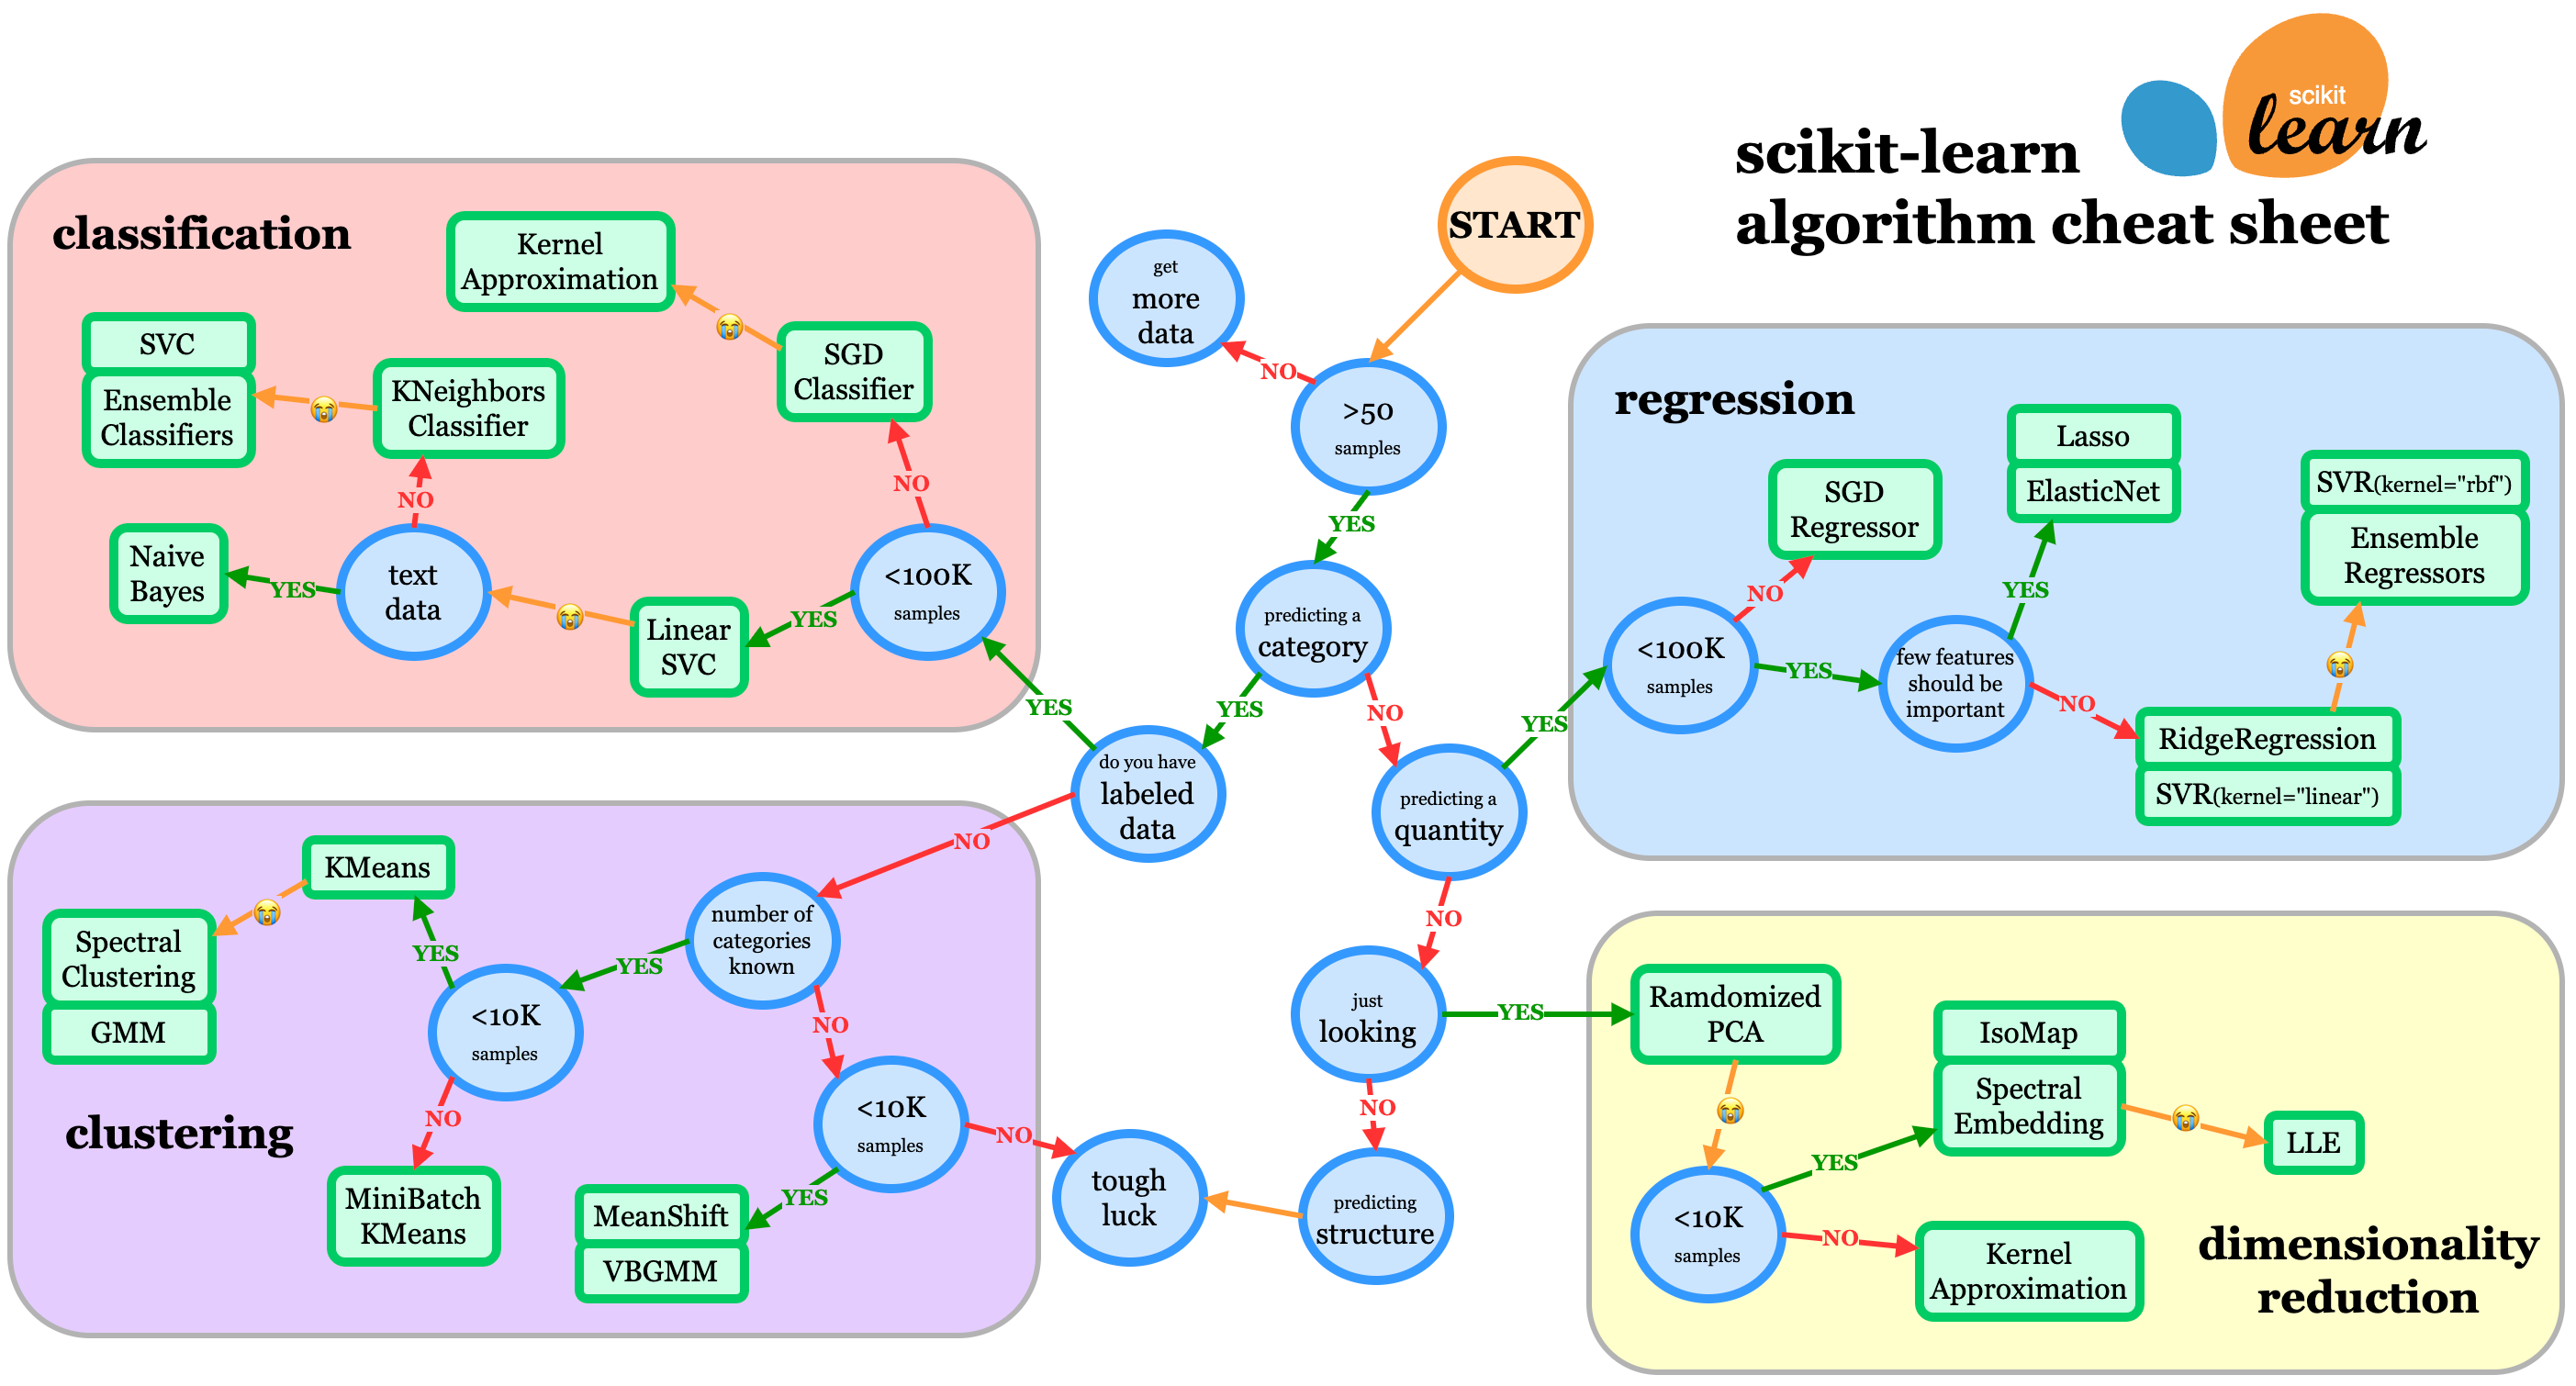

# 2. Data preparation

The most essential thing for machine learning is data. Let's prepare some data for go through the upcoming tasks.

### (1) Loading external data with `pandas`

`pd.read_csv`: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

`pandas` provides functions for loading dataset in various format. Here is an example of reading CSV file (iris dataset) by using `read_csv(...)` function. It returns a `pd.DataFrame` object.



`pd.DataFrame`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
> Two-dimensional, size-mutable, potentially heterogeneous tabular data. The primary pandas data structure.

In [ ]:
# load data with `read_cvs` function and it returns us a ``
housing = pd.read_csv('./ca_housing.csv')

In [ ]:
# show the first five rows of the dataset
housing.head()


California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

**The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).**

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

**References**

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [ ]:
# we can also show the first n rows by passing an augment to this function
housing.head(10)

In [ ]:
# show the last five rows of the dataset
housing.tail()

In [ ]:
# show the shape of the dataset
housing.shape

There are 20,640 rows (data samples) and 9 columns (8 attributes + 1 label)

In [ ]:
# get a column (`pd.Series`)
housing['MedInc']

In [ ]:
# get rows by index
housing.iloc[5]

In [ ]:
housing.iloc[2:8]

In [ ]:
# to index a range of rows, we can simplify it to:
housing[2:8]

In [ ]:
# select columns by index as well
X = housing.iloc[:, :8]  # select the first eight columns (attributes/features)
X

In [ ]:
# We can get a `numpy.ndarray` representation of it by access its `.values` attribute.
X.values

In [ ]:
y = housing.iloc[:, 8]
y

## Exploring data

After loading the dataset, it's good to take a look to the data. `.info()` would give us a summary of the DataFrame.

In [ ]:
X.info()

As you could see that there are 150 entries in the DataFrame, with index `0` to `149`.

`.describe()` let us know statistical detial of each column in a DataFrame.

In [ ]:
X.describe()

We may have an overview of data in pair-plot with `seaborn`.

We have 14,448 samples for training and 6,192 samples for testing.

# 2. Linear Regression

Let's start from the simplest regression model: Lienar Regression. It fits a linear model for the data:

$$\hat{y}(w, x) = w_1 x_1 + ... + w_p x_p + b,$$

where $\hat{y}$ is the predicted value.

## (1) Hold-out method for performance evaluation

Recall from the lecture content how we can evaluate the performance. Let's first try a simpler method: the hold-out method. We simply devide the data into training and test set. Then we can train the model using the training subset and measure the performance using the test subset.

We can do this using the `train_test_split` function. By default, it samples training and test datasets in a stratified fashion.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

`test_size`: the size of the test subset. If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

`train_size`: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

`random_state`: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

## (1) Train a linear regression model
We can use the `LienarRegression` model provided in `scikit-learn`:


`LinearRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # define the linear regression model
model.fit(X_train, y_train)  # fit the data

In [ ]:
print('The weight vector is:', model.coef_)
print()
print('The bias is:', model.intercept_)

## (2) Make predictions for new data

To predict values with the estimation, we would use `.predict(input_data)` function. It would return the predicted value of `input_data`.

In [ ]:
y_pred = model.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

## (3) Evaluate the performance: use MSE for regression problems

In [ ]:
# We can compute the MSE by the following:
mse = ((y_test - y_pred) ** 2).mean()
print(mse)

In [ ]:
# Or even easier, sklearn provides us this metric. We can use it by simply calling the corresponding function.
from sklearn.metrics import mean_squared_error

# sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
mse = mean_squared_error(y_test, y_pred)
print(mse)

They give the same results.
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
# We can also compute the MSE for the training set
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)

## (4) Use repeated hold-out method for evaluation

Recall from the lecture that hold-out method can sometimes be unstable. Let's try to repeat this process for multiple times.

### *Try it out!*

In [ ]:
# Try it out!
# Copy the codes from above and modify them to train the linear regression 
# using repeated hold-out evaluation (five times)



## (5) Use K-fold Cross Validation for evaluation

Recall from the lecture that K-fold cross validation is a more systematical way of evaluating the performance of machine learning models. We can do this by creating a `KFold` validator.

```sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)```

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# a simple example
X_demo = np.array([[1, 2],
                   [3, 4],
                   [1, 2],
                   [3, 4],
                   [5, 6],
                   [1, 2],
                   [3, 4],
                   [1, 2],
                   [3, 4],
                   [5, 6]])
y_demo = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


kf = KFold(n_splits=5, shuffle=False)

print(kf.get_n_splits())  # return the number of splits

for train_index, test_index in kf.split(X_demo):
    print("index of training data:", train_index, "index of test data:", test_index)
    
    X_train, X_test = X_demo[train_index], X_demo[test_index]
    y_train, y_test = y_demo[train_index], y_demo[test_index]
    print(X_train)
    print(X_test)
    print()

### *Try it out!*

In [ ]:
# Try it out!
# Copy the codes from above and modify them to train the linear regression 
# using ten-fold cross validation



# 2. Logistic Regression for Classification

## (1) Dataset for classification

For classification task, let's explore another simple dataset, the breast cancer wisconsin dataset. `scikit-learn` provides this dataset to us and we can get it by simply calling the `sklearn.datasets.load_breast_cancer` function

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
X.shape

We have 569 samples and 30 attributes for this dataset.

In [ ]:
y.shape

In [ ]:
X.head()

## (2) Training a logistic regression model

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# first import the model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Its usage is acturally quite simple. Just define a model and fit it with data,
# like what we did for regression.


# for simplicity, we use hold-out method to demonstrate the model. As an after-class exercise, 
# modify it to a better evaluation method.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=15)

lr = LogisticRegression()
lr.fit(X_train, y_train)

## (3) Making predictions for new data

In [ ]:
# Now, let's look at its output for new data
y_preds = lr.predict(X_test)  # this will directly give us the prediction of the labels.
y_preds

In [ ]:
# We can also look at the score (probability)
y_preds_proba = lr.predict_proba(X_test)  # This now gives us V columns: V is the number of labels.

y_preds_proba
# this problem is a binary classification problem, so the first column corresponds 
# to probability of negative prediction (0) and the second column corresponds to the
# probability of positive prediction (1).

In [ ]:
# If we add the two columns up, the probabilities add up to one.
y_preds_proba.sum(axis=1)

## (4) Computing the evaluation metrics

### i) The confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

In [ ]:
# we can show it in a pretty form
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
disp.plot()

### ii) Accuracy, precision, recall, and F1 scores

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(f1_score(y_test, y_preds))

### iii) ROC curve and AUC score

We can plot the ROC curve by simply calling a built-in function: `sklearn.metric.RocCurveDisplay`

Documentations: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)  # We pass the trained model and the test data to this function

plt.show()

To compute the AUC score, we can use another function provided by sklearn: `sklearn.metrics.roc_auc_score`

Documentations: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_preds_proba[:, 1]))  # need to pass the probability of predicting positive to it

### (5) Hyperparameter tuning

Let's first look at the performance metric on the training set.

In [ ]:
print(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

We see there is a gap between the training and testing AUC, although quite small. The `LogisticRegression` implemented in scikit-learn actually contains a regularization term. Recall from the lecture that regularization is a technique that could prevent the model from overfitting. The strength of this regularization can be controlled by an augment:

- `C`: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

We can turn this knob and potentially it could make the model even generalize better. Such parameters that need to be specified before training a model is called "**hyperparameters**". The best setting of this hyperparameter is usually found by experiments and this experimenting process is called "**hyperparameter tuning**"

In [ ]:
# We can try different values of `C` to see which one performs better.
test_auc_scores = []
for C in [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 10]:
    lr2 = LogisticRegression(C=C)  # specify the value of C
    lr2.fit(X_train, y_train)
    
    auc = roc_auc_score(y_test, lr2.predict_proba(X_test)[:, 1])
    test_auc_scores.append(auc)

In [ ]:
test_auc_scores

# 3. Decision Tree Algorithm and Random Forest

### (1) Decision Tree

See the scikit-learn documentation for more details: https://scikit-learn.org/stable/modules/tree.html

and this one: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Similarly, scikit-learn provides us very easy-to-use API. Just simply define the model and fit the data.

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

In [ ]:
# Scikit-learn even provides us tools to visualize the decision tree learned

from sklearn.tree import plot_tree

plt.figure(figsize=(30, 30))
plot_tree(dtc, filled=True)
plt.show()

In [ ]:
# making predictions
y_preds = dtc.predict(X_test)
y_preds

In [ ]:
dtc.predict_proba(X_test)  # the decision tree algorithm cannot give us a probability.

### *Try it out!*

In [ ]:
# Try it out!
# Compute different evaluation metrics for this decision tree classifier.



### (2) Random Forest

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)

In [ ]:
y_preds = rf.predict(X_test)
y_preds

In [ ]:
print(accuracy_score(y_test, y_preds))

### *Try it out!*

In [ ]:
# Try it out!
# (1) Compute different evaluation metrics for this random forest classifier.



In [ ]:
# Try it out!
# (2) Try to use different numbers of base learners and see how it affects the performance.


# 4. Multi-class Classification

All of the models introduced above can be used for multi-class classification.

In [ ]:
X, y = sklearn.datasets.load_digits(return_X_y=True, as_frame=True)

In [ ]:
X.shape  # (8x8 images: 64 pixels)

In [ ]:
y  # ten classes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=15)

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# The model output will also give as the class label
y_preds = lr.predict(X_test)
y_preds

In [ ]:
# The prediction probability now has ten columns
y_preds_proba = lr.predict_proba(X_test)
y_preds_proba

In [ ]:
# We can still plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
disp.plot()

In [ ]:
# We can also compute the accuracy score:
print(accuracy_score(y_test, y_preds))

**N.B.**: Other evaluation metrics for multi-class classification task are more complicated. If you are interested or if you need to use them, please check them out in the scikit-learn documentations.

# 5. Exercise

Pick 2-3 datasets from https://scikit-learn.org/stable/datasets.html and build machine learning models for the datasets you picked.